#  *** Indian startups case study 1***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
''' This dataset has funding information of the Indian startups from January 2015 to August 2017.
Feature Details :
SNo - Serial number.
Date - Date of funding in format DD/MM/YYYY.
StartupName - Name of the startup which got funded.
IndustryVertical - Industry to which the startup belongs.
SubVertical - Sub-category of the industry type.
CityLocation - City which the startup is based out of.
InvestorsName - Name of the investors involved in the funding round.
InvestmentType - Either Private Equity or Seed Funding.
AmountInUSD - Funding Amount in USD.
Remarks - Other information, if any.
'''

' This dataset has funding information of the Indian startups from January 2015 to August 2017.\nFeature Details :\nSNo - Serial number.\nDate - Date of funding in format DD/MM/YYYY.\nStartupName - Name of the startup which got funded.\nIndustryVertical - Industry to which the startup belongs.\nSubVertical - Sub-category of the industry type.\nCityLocation - City which the startup is based out of.\nInvestorsName - Name of the investors involved in the funding round.\nInvestmentType - Either Private Equity or Seed Funding.\nAmountInUSD - Funding Amount in USD.\nRemarks - Other information, if any.\n'

### Printing the top 5 rows of the dataframe to have a glimpse of what type of data is stored.

In [ ]:
df1 = pd.read_csv('/content/startup_funding.csv')
df = df1.copy()
df.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.shape

(3044, 10)

In [ ]:
df=df.rename(columns={'Date dd/mm/yyyy':'Date'})

In [ ]:
df.isnull().sum()

Sr No                   0
Date                    0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

### **1 . Checking the trend of investments by plotting number of fundings done in each year.**

In [ ]:
## need to extract year from Date column
df.Date.dtype

dtype('O')

In [ ]:
## to find out issues in Date column like . and // in place of / in some dates .
unique_dates = df.Date.unique().tolist()
##unique_dates

<ipython-input-10-3e953e741a10>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Date = df.Date.str.replace('.','/' )


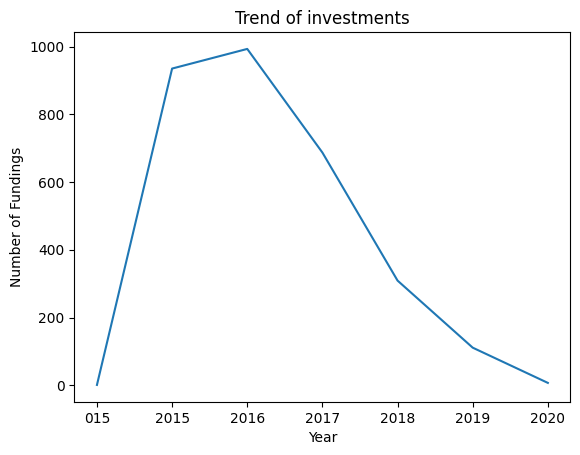

Year :  015 , No. of fundings :  1
Year :  2015 , No. of fundings :  935
Year :  2016 , No. of fundings :  993
Year :  2017 , No. of fundings :  687
Year :  2018 , No. of fundings :  309
Year :  2019 , No. of fundings :  111
Year :  2020 , No. of fundings :  7


In [ ]:
## removing issue in Date column
df.Date = df.Date.str.replace('.','/' )
df.Date = df.Date.str.replace('//','/')
## extracting year from date column
year = df.Date.str.split('/' , expand = True)[2]
## sorting year in chronological order
year =  year.value_counts().sort_index()
x = year.index
y = year.values
## plotting line plot
plt.plot(x,y)
plt.title('Trend of investments')
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.show()
for i in range(7):
    print('Year : ' , x[i],', No. of fundings : ' , y[i])

Note : that 015 is also a 2015 I think so

# By checking the trend of investments by plotting number of fundings done in each year we see that in year 2015 and 2016 there wrer lot of investment is done and after that its decreasing over the years.

### **2. Top 10 Indian cities which have most number of startups .**

In [ ]:
''' On analysing CityLocation column i found some issues in city names
 like bangalore and bangalore , Delhi and New delhi as shown.
 Also for few startups multiple locations are given, one Indian and one Foreign. i have counted those startups
 in Indian startup also after analysing the dataset.
 '''
##df.CityLocation.unique().tolist()

' On analysing CityLocation column i found some issues in city names\n like bangalore and bangalore , Delhi and New delhi as shown.\n Also for few startups multiple locations are given, one Indian and one Foreign. i have counted those startups\n in Indian startup also after analysing the dataset.\n '

In [ ]:
print(df["City  Location"].unique())

['Bangalore' 'Gurgaon' 'New Delhi' 'Mumbai' 'Chennai' 'Pune' 'Noida'
 'Faridabad' 'San Francisco' 'San Jose,' 'Amritsar' 'Kormangala'
 'Tulangan' 'Hyderabad' 'Burnsville' 'Menlo Park' 'Palo Alto'
 'Santa Monica' 'Singapore' 'Taramani' 'Andheri' 'Chembur' 'Nairobi'
 'Haryana' 'New York' 'Karnataka' 'Bhopal' 'Bengaluru And Gurugram'
 'India' 'Jaipur' 'Nagpur' 'Indore' 'New York, Bengaluru' 'California'
 'Ahemadabad' 'Rourkela' 'Srinagar' 'Bhubneswar' 'Chandigarh'
 'Delhi & Cambridge' 'Kolkata' 'Coimbatore' 'Udaipur' nan 'Ahemdabad'
 'Bhubaneswar' 'Ahmedabad' 'Surat' 'Goa' 'Uttar Pradesh' 'Gaya' 'Vadodara'
 'Trivandrum' 'Missourie' 'Panaji' 'Gwalior' 'Karur' 'Udupi' 'Kochi'
 'Agra' 'Hubli' 'Kerala' 'Kozhikode' 'Us' 'Siliguri' 'Usa' 'Lucknow'
 'Kanpur' 'Sfo' 'London' 'Seattle' 'Varanasi' 'Jodhpur' 'Boston' 'Belgaum'
 'Dallas']


<ipython-input-15-ff5d7897964b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['City  Location'] = df['City  Location'].str.replace(r'\\\\xc2\\\\xa0', ' ')  # Remove unnecessary characters


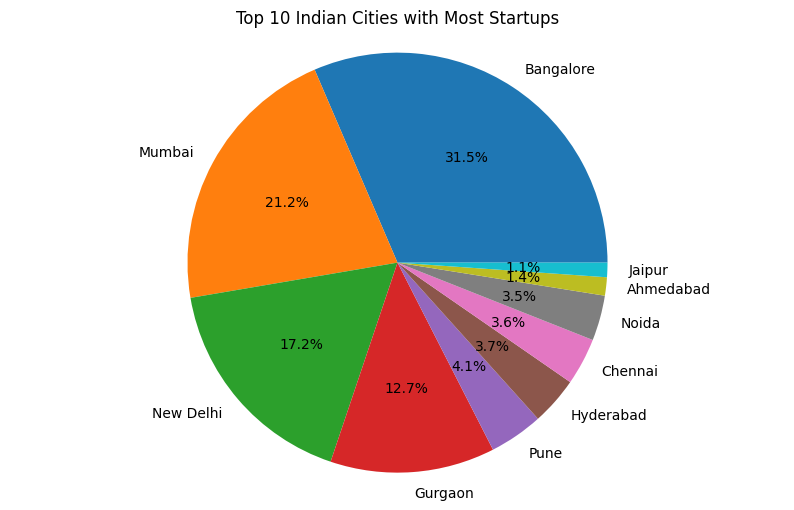

Bangalore    849
Mumbai       573
New Delhi    463
Gurgaon      342
Pune         112
Hyderabad    100
Chennai       98
Noida         94
Ahmedabad     38
Jaipur        30
Name: City  Location, dtype: int64


In [ ]:
df['City  Location'] = df['City  Location'].str.replace(r'\\\\xc2\\\\xa0', ' ')  # Remove unnecessary characters
df['City  Location'] = df['City  Location'].str.split('/', n=1).str[0]  # Split multiple locations and take the first one

# Handle city name variations
df['City  Location'] = df['City  Location'].str.strip().str.title()
df['City  Location'] = df['City  Location'].replace(['Delhi','Nw Delhi'], 'New Delhi')
df['City  Location'] = df['City  Location'].replace(['Bangalore', 'Bengaluru',], 'Bangalore')
df['City  Location'] = df['City  Location'].replace(['Gurgaon', 'Gurugram',], 'Gurgaon')
df['City  Location'] = df['City  Location'].replace(['Kolkatta' ,'Kolkata'],'Kolkata')
# Count the number of startups in each city
city_counts = df['City  Location'].value_counts()

# Find top 10 Indian cities with most startups
top_10_cities = city_counts.head(10)

# Plot a pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%')
plt.title('Top 10 Indian Cities with Most Startups')
plt.axis('equal')
plt.show()

# Print city names and number of startups in descending order
print(top_10_cities)

# The Top 10 Indian cities which have most number of startups are
Bangalore  ,  Mumbai ,      New Delhi,    Gurgaon,      Pune,       Hyderabad   , Chennai    ,   Noida     ,    Ahmedabad   ,  Jaipur.      

### **3 .  Top 10 Indian cities with most amount of fundings received. Also calculating percentage of funding each city has got (among top 10 Indian cities only).**

In [ ]:
df=df.rename(columns={'Amount in USD':'AmountInUSD'})

Answer 1 :

In [ ]:
# Filtering out non-Indian cities
indian_cities = ['Bangalore', 'Mumbai', 'Gurgaon', 'New Delhi', 'Noida', 'Chennai', 'Pune', 'Hyderabad', 'Ahmedabad', 'Jaipur']
df_indian_cities = df[df['City  Location'].isin(indian_cities)]

# Grouping by city and calculating the total amount of funding received by each Indian city
city_amount = df_indian_cities.groupby('City  Location')['AmountInUSD'].sum().sort_values(ascending=False)[:10]
city = city_amount.index
amountCity = city_amount.values

# Calculating the percentage of funding each city has received
perAmount = np.true_divide(amountCity, amountCity.sum()) * 100

# Printing the top 10 Indian cities with the most amount of funding received and their respective percentages
for i in range(len(city)):
    print(city[i], format(perAmount[i], '.2f'), '%')


Bangalore 60.30 %
Mumbai 16.10 %
Gurgaon 12.62 %
Noida 4.12 %
Chennai 2.34 %
Pune 2.34 %
Hyderabad 1.31 %
Jaipur 0.50 %
Ahmedabad 0.37 %


Answer 2 :

In [ ]:
# Assuming you have already executed the previous code and obtained the DataFrame 'df'

# Grouping by city and calculating the total amount of funding received by each city
city_amount = df.groupby('City  Location')['AmountInUSD'].sum().sort_values(ascending=False)[:10]
city = city_amount.index
amountCity = city_amount.values

# Calculating the percentage of funding each city has received
perAmount = np.true_divide(amountCity, amountCity.sum()) * 100

# Printing the top 10 Indian cities with the most amount of funding received and their respective percentages
for i in range(len(city)):
    print(city[i], format(perAmount[i], '.2f'), '%')


Bangalore 53.51 %
Mumbai 14.29 %
Gurgaon 11.20 %
New New Delhi 9.72 %
Noida 3.65 %
Chennai 2.08 %
Pune 2.08 %
Menlo Park 1.30 %
Hyderabad 1.16 %
India 1.01 %


# From above two diffrent answer we get the  Top 10 Indian cities with most amount of fundings received so take the as per our convience for the task.

### **4. Percentage of amount funded for each investment type ( there are 4 investment types).**

In [ ]:
df['InvestmentnType'].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\\nEqui

Private Equity 96.74 %
Seed Funding 2.79 %
Debt Funding 0.47 %
Crowd Funding 0.00 %


<ipython-input-54-b20da6cf124c>:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percent in sorted_categories.iteritems():


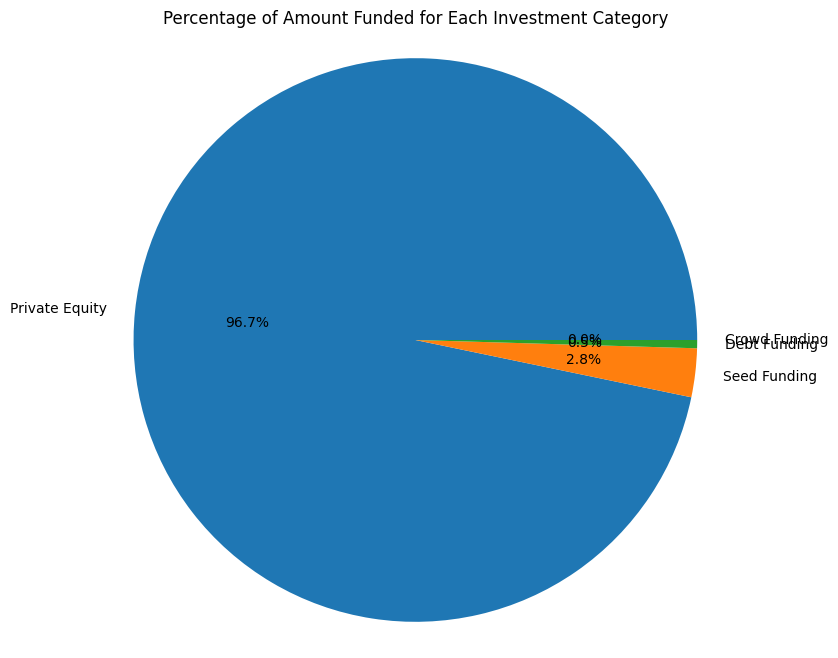

In [ ]:
unique_investment_types = ['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
                           'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
                           'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
                           'Seed Funding', None, 'Funding Round', 'Corporate Round',
                           'Maiden Round', 'pre-series A', 'Seed Funding Round',
                           'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
                           'Series J', 'Angel Round', 'pre-Series A',
                           'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
                           'Debt and Preference capital', 'Inhouse Funding',
                           'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
                           'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
                           'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
                           'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
                           'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
                           'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
                           'Private\\\\nEquity', 'Crowd funding', 'Crowd Funding']

# Mapping dictionary to categorize investment types
investment_mapping = {
    'Private Equity': ['Private Equity Round', 'Private Equity', 'PrivateEquity', 'Private','Series C', 'Series B', 'Pre-series A',
       'Series A', 'Series D',  'Series F',
       'Series E',  'Series G', 'Series H', 'Venture',
       'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round',
        'Inhouse Funding',
        'Pre Series A', 'Equity','Mezzanine', 'Series B (Extension)'],
    'Seed Funding': ['Seed Round', 'Seed', 'Seed Funding', 'Seed Funding Round', 'Seed\\\\nFunding', 'Seed/ Angel Funding',
                     'Seed / Angel Funding', 'Seed\\\\nFunding', 'Seed / Angle Funding', 'Seed / Angel Funding',
                     'Seed/Angel Funding', 'Angel / Seed Funding'],
    'Debt Funding': ['Debt Funding', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Structured Debt', 'Term Loan'],
    'Crowd Funding': ['Crowd funding', 'Crowd Funding']
}


def categorize_investment_type(type):
    for category, types_list in investment_mapping.items():
        if type in types_list:
            return category
    return None

df['InvestmentCategory'] = df['InvestmentnType'].apply(categorize_investment_type)

# Calculate the percentage of amount funded for each investment category
category_amount = df.groupby('InvestmentCategory')['AmountInUSD'].sum()
total_amount_funded = category_amount.sum()
category_percent = (category_amount / total_amount_funded) * 100

# Sort the investment types in descending order based on the percentage of amount funded
sorted_categories = category_percent.sort_values(ascending=False)

# Print the investment type and percentage of amount funded with 2 decimal places after rounding off
for category, percent in sorted_categories.iteritems():
    print(category, format(percent, '.2f'), '%')

# Plot a pie chart to visualize the percentage of amount funded for each investment category
plt.figure(figsize=(8, 8))
plt.pie(sorted_categories, labels=sorted_categories.index, autopct='%1.1f%%')
plt.title('Percentage of Amount Funded for Each Investment Category')
plt.axis('equal')
plt.show()

#Private Equity 96.74 % ,Seed Funding 2.79 %, Debt Funding 0.47 %, Crowd Funding 0.00 %.

### **5. Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)**

In [ ]:
## finding title and non-title case issue in industry name as shown.
##df.IndustryVertical.unique().tolist()

In [ ]:
##correcting the above stated issue.
df['Industry Vertical'].replace("ECommerce","Ecommerce", inplace = True)
df['Industry Vertical'].replace("eCommerce","Ecommerce", inplace = True)
df['Industry Vertical'].replace("ecommerce","Ecommerce", inplace = True)

## converting amount to int type
df.AmountInUSD = df.AmountInUSD.apply(lambda x : float(str(x).replace(',','')))
df.AmountInUSD = pd.to_numeric(df.AmountInUSD)

##calculating industry wise amount
ivc = df.groupby('Industry Vertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]
industry = ivc.index
amount = ivc.values
## calculating the percentage of total amount funded .
per = np.true_divide(amount  , amount.sum())*100

for i in range(5):
    print(industry[i] , format(per[i] , '.2f'))




Ecommerce 33.27
Consumer Internet 29.04
Transportation 18.19
Technology 10.35
Finance 9.15


# Ecommerce (33.27) ,Consumer Internet (29.04) ,Transportation (18.19) ,Technology (10.35) ,Finance (9.15)


### **6. Top 5 startups with most amount of total funding**

In [ ]:
## Correcting names of Ola, Flipkart, Oyo, Paytm startups .
## below way works only when there are no NaN values , so to use this technique with other columns , drop NaN from
## those columns
##for i in np.unique(sorted(df.StartupName)):
##    print(i)

In [ ]:
import pandas as pd

# Assuming you have already read the data into df1
reader = df1.copy()

# Correcting names
reader['Startup Name'].replace({
    "Flipkart.com": "Flipkart",
    "Ola Cabs": "Ola",
    "Olacabs": "Ola",
    "OYO Rooms": "Oyo",
    "Oyo Rooms": "Oyo",
    "OyoRooms": "Oyo",
    "Oyorooms": "Oyo",
    "Paytm Marketplace": "Paytm"
}, inplace=True)

# Converting amount column to int
reader['Amount in USD'] = reader['Amount in USD'].str.replace(',', '')
reader['Amount in USD'] = pd.to_numeric(reader['Amount in USD'], errors='coerce')

# Drop rows with NaN in 'Amount in USD' column
reader.dropna(subset=['Amount in USD'], inplace=True)

# Startup wise calculating amount.
invest = reader.groupby('Startup Name')['Amount in USD'].sum().sort_values(ascending=False)
print('Top 5 startups with most amount of funding in descending order are as follows:')
for i in range(5):
    print(invest.index[i])


Top 5 startups with most amount of funding in descending order are as follows:
Flipkart
Rapido Bike Taxi
Paytm
Ola
Oyo


#Top 5 startups with most amount of funding in descending order are as follows:
Flipkart,
Rapido Bike Taxi,
Paytm,
Ola,
Oyo.

### **7. Top 5 startups that received the most number of funding rounds.(i.e. funding most number of times)**

In [ ]:
## reader is the dataframe object
startup_number = reader['Startup Name'].value_counts()
su = startup_number.index
val = startup_number.values
for i in range(5):
    print(su[i] , val[i])


Ola 12
Oyo 9
Swiggy 8
Paytm 6
Flipkart 6


# Top  startup that received the most number of funding roundsOla

#Extra insights

### **8 .The Investor who have invested maximum number of times.**

In [ ]:
# Removing rows having NA value in InvestorsName column
df = df[pd.notna(df['Investors Name'])]

inv_name = df['Investors Name']

# A dictionary to store the count of how many times an investor has invested.
d = {}
for row in inv_name.iteritems():
    # As row[0] will contain row label, we use row[1] to get the Investor's name and then split it.
    v = row[1].split(',')
    for i in v:
        i = i.strip()
        d[i] = d.get(i, 0) + 1

ans = -1
val = ''
for v in d:
    if d[v] > ans:
        ans = d[v]
        val = v

print(val, ':', int(ans), 'times')


Sequoia Capital : 72 times


<ipython-input-69-50bdb9a0e77a>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row in inv_name.iteritems():
